In [35]:
# импортируем библиотеки
import pandas as pd
 
# Загрузка датасета и ознакомление с ним

data = pd.read_csv('/content/drive/MyDrive/train_dataset_train.csv')
data.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [36]:
# Уберем ненужные данные

columns_adios1 = [
    
    'id',              # id - уникальный идентификатор столбца
    'ticket_id',       # ticket_id - уникальный идентификатор билета, считается, что у одного билета один владелец
    'station_nm',      # station_nm - наименование станции захода
    'entrance_nm',     # entrance_nm - название станции
    'line_nm'          # line_nm - наименование ветки, на которой находится станция

]

data = data.drop(columns=columns_adios1)
data.head()

,ticket_type_nm,entrance_id,station_id,line_id,pass_dttm,time_to_under,label
0,Пропуск FacePay,2402,11007,11,2022-09-12 05:00:13,216.316667,8001
1,СК учащегося 30 дней,110,2006,2,2022-09-12 05:00:54,648.183333,9011
2,БСК дружинника г.Москвы,110,2006,2,2022-09-12 05:00:55,865.333333,7022
3,30 дней,110,2006,2,2022-09-12 05:01:13,1048.233333,2022
4,КОШЕЛЕК,110,2006,2,2022-09-12 05:02:55,965.600000,2017


In [37]:
# Разведочный анализ данных: Data Cleaning

print('Размер выбоpки: {}, {}'.format(data.shape[0], data.shape[1]))

Размер выбоpки: 1091021, 7


In [41]:
data['ticket_type_nm'].unique()

array(['Пропуск FacePay', 'СК учащегося 30 дней',
       'БСК дружинника г.Москвы', '30 дней', 'КОШЕЛЕК',
       'СК студента 30 дней', '90 дней', '90 дней ЕДИНЫЙ ТК',
       '30 дней СК учащегося', '90 дней СК студента',
       '30 дней СК студента', 'ББК', 'СК аспиранта 90 дней',
       'Социальная карта москвича', '30 дней ЕДИНЫЙ ТК',
       'Социальная карта жителя Моск. области', '30 дней Пригород ТК',
       'Социальная карта москвича с сопровождающим',
       'Пропуск сотрудника УВД по охране Метрополитена',
       '60 поездок ЕДИНЫЙ ТК', 'СК для сотрудника ГУВД г.Москвы',
       '365 дней ЕДИНЫЙ ТК', 'ВЕСБ МОСКВА (7мин)', 'СК студента 90 дней',
       '90 дней Пригород ТК', '30 дней  Пригород', '365 дней Пригород ТК',
       '365 дней', 'СК ординатора 30 дней', '30 дней СК аспиранта',
       '30 дней СК ординатора', '90 дней СК ординатора',
       'ВЕСБ МО (7 мин)', 'ВЕСБ МО (тип 5)', 'СК ординатора 90 дней',
       'СК аспиранта 30 дней', '90 дней СК учащегося',
       'Времен

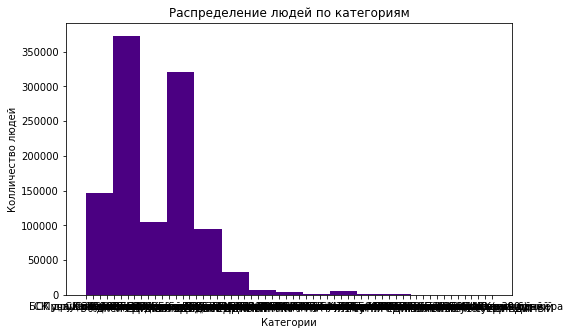

In [42]:
# ПРОСТИТЕ пожалуйста, я не успел сделать как хотел

plt.figure(figsize=(8,5))
plt.hist(data.ticket_type_nm, bins=15, color='indigo')
plt.xlabel('Категории')
plt.ylabel('Колличество людей')
plt.title('Распределение людей по категориям');

In [11]:
# Выведем количество полностью заполненных объектов и их процент из всей выборки

values = ((data.isna().sum() / len(data)) * 100).sort_values()
count = 0

for i in values:
    if i == 0:
        count += 1
print(f'Количество полностью заполненных объектов - {count}')
print(f'Их процент из всей выборки - {int(count / len (values) * 100)}%')

Количество полностью заполненных объектов - 7
Их процент из всей выборки - 100%


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
# id - уникальный идентификатор столбца; 
# ticket_id - уникальный идентификатор билета, считается, что у одного билета один владелец 

# ticket_type_nm - тип билета 

# entrance_id - уникальный id входа в станцию 
# entrance_nm - название станции
# station_id - уникальное id станции захода 
# station_nm - наименование станции захода 

# line_id - уникальный id ветки на, которой находится станция 
# line_nm - наименование ветки, на которой находится станция 

# pass_dttm - дата валидации 

# time_to_under (столбец для предсказания) - сколько времени прошло между первой и второй валидацией
# label (столбец для предсказания) - id второй станции, на которои

In [13]:
data['pass_dttm'] = pd.to_datetime(data['pass_dttm'])
data['hour'] = data['pass_dttm'].dt.hour

data['time_of_day'] = data['hour'].apply(
    lambda hour: 'morning' if hour>=5 and hour<=10 else (
                 'day' if hour>=11 and hour<=16 else (
                 'evening' if hour>=17 and hour<=22 else 'night')))

data['is_weekend'] = data['pass_dttm'].dt.weekday>4

data = data.drop(['pass_dttm'], axis=1)
data = data.drop(['hour'], axis=1)

data.head()

,ticket_type_nm,entrance_id,station_id,line_id,time_to_under,label,time_of_day,is_weekend
0,Пропуск FacePay,2402,11007,11,216.316667,8001,morning,False
1,СК учащегося 30 дней,110,2006,2,648.183333,9011,morning,False
2,БСК дружинника г.Москвы,110,2006,2,865.333333,7022,morning,False
3,30 дней,110,2006,2,1048.233333,2022,morning,False
4,КОШЕЛЕК,110,2006,2,965.600000,2017,morning,False


In [14]:
# переводим категориальные признаки в векторы

data = pd.get_dummies(data, prefix='day', columns=['time_of_day'])
data = pd.get_dummies(data, prefix='weekend', columns=['is_weekend'])
data = pd.get_dummies(data, prefix='line', columns=['line_id'])

data.head()

,ticket_type_nm,entrance_id,station_id,time_to_under,label,day_day,day_evening,day_morning,day_night,weekend_False,...,line_7,line_8,line_9,line_10,line_11,line_12,line_13,line_14,line_15,line_81
0,Пропуск FacePay,2402,11007,216.316667,8001,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
1,СК учащегося 30 дней,110,2006,648.183333,9011,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,БСК дружинника г.Москвы,110,2006,865.333333,7022,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,30 дней,110,2006,1048.233333,2022,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,КОШЕЛЕК,110,2006,965.600000,2017,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
columns_adios2 = [
    'day_day',
    'weekend_False'
]
data = data.drop(columns = columns_adios2)

data.head()



,ticket_type_nm,entrance_id,station_id,time_to_under,label,day_evening,day_morning,day_night,weekend_True,line_1,...,line_7,line_8,line_9,line_10,line_11,line_12,line_13,line_14,line_15,line_81
0,Пропуск FacePay,2402,11007,216.316667,8001,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,СК учащегося 30 дней,110,2006,648.183333,9011,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,БСК дружинника г.Москвы,110,2006,865.333333,7022,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 дней,110,2006,1048.233333,2022,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,КОШЕЛЕК,110,2006,965.600000,2017,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Также обработаем оставшиеся данные - кто студент, а кто нет

In [16]:
data['is_student'] = data['ticket_type_nm'].apply(
    lambda ticket_type_nm: 1 if 'учащ' in ticket_type_nm \
        or 'студент' in ticket_type_nm else 0)
data['is_social'] = data['ticket_type_nm'].apply(
    lambda ticket_type_nm: 1 if 'оциальн' in ticket_type_nm else 0)

data.head(10)

,ticket_type_nm,entrance_id,station_id,time_to_under,label,day_evening,day_morning,day_night,weekend_True,line_1,...,line_9,line_10,line_11,line_12,line_13,line_14,line_15,line_81,is_student,is_social
0,Пропуск FacePay,2402,11007,216.316667,8001,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,СК учащегося 30 дней,110,2006,648.183333,9011,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,БСК дружинника г.Москвы,110,2006,865.333333,7022,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30 дней,110,2006,1048.233333,2022,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,КОШЕЛЕК,110,2006,965.600000,2017,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,СК студента 30 дней,103,2003,148.683333,11012,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,Пропуск FacePay,2258,15001,192.150000,15001,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,Пропуск FacePay,2117,7007,229.400000,7014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,90 дней,103,2003,720.616667,5007,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,СК студента 30 дней,107,2018,329.433333,6018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [18]:
target1 = data['time_to_under']
target2 = data['label']

In [20]:
F = data.drop(columns=['time_to_under', 'label', 'station_id', 'ticket_type_nm', 'entrance_id' ])

In [25]:
# Классификация

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

F_train1, F_test1, target_train1, target_test1 = train_test_split(F, target2, test_size = 0.25)

model = RandomForestClassifier(n_estimators=10)
model.fit(F_train1, target_train1)

target_predict1 = model.predict(F_test1)

from sklearn.metrics import recall_score

recall_score(target_test1, target_predict1, average='weighted')

0.04164161375001833

In [26]:
# Регрессия

from sklearn.linear_model import LinearRegression

F_train, F_test, target_train, target_test = train_test_split(F, target1, test_size=0.25,random_state=True)

model = LinearRegression()
model.fit(F_train, target_train)

T_predict = model.predict(F_test)

from sklearn.metrics import r2_score

r2_score(target_test, T_predict)

0.44296062314996876

In [28]:
print(0.5 * (r2_score(target_test, T_predict) + recall_score(target_test1, target_predict1, average='weighted')))

0.24230111844999355
